## Aufgabe 5 


In [47]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
np.random.seed(4)
generator = np.random.uniform(0,1,1000)


### (a) 

Es wird ein Algorithmus zur Transformation einer Gleichverteilung im Bereich 0 bis 1 auf den Bereich $x_\text{min}$ bis $x_\text{max}$ beschrieben. 

In [48]:
def gleichingrenzen(xmin, xmax, anzahl): 
    generator = np.random.uniform(0,1, anzahl)
    return np.array((xmax-xmin) * generator + xmin)

### (b) 

Es wird ein Algorithmus zur Transformation einer Gleichverteilung im Bereich 0 bis 1 auf eine exponentielle Verteilung mit $\tau$ beschrieben. 

In [49]:
def gleich2exponential(tau): 
    return -np.log(1-generator)*tau  

### (c) 

Es wird ein Algorithmus zur Transformation einer Gleichverteilung im Bereich 0 bis 1 auf eine Potenz-Verteilung im Bereich $x_\text{min}$ bis $x_\text{max}$ mit der Potenz $n$ mit $n \geq 2$ beschrieben. 

In [50]:
def gleich2potenz(xmin, xmax, n): # noch falsch
    if n >= 2:
        return (generator* (xmin**(n-1)-xmax**(n-1))/(xmax*xmin)**(n-1) + xmin**(-n+1))**(1/(-n+1)) 
    else: print("Bitte geben sie einen Wert für n größer oder gleich 2 ein.")

### (d) 

Es wird ein Algorithmus zur Transformation einer Gleichverteilung im Bereich 0 bis 1 auf eine Cauchy-Verteilung beschrieben. 

In [51]:
def gleich2cauchy():
    return np.tan(np.pi*generator) 

Eine Testumgebung, die die Verteilungen und ihre Funktionen plottet. 

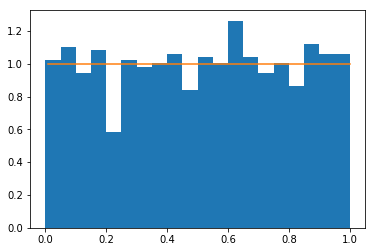

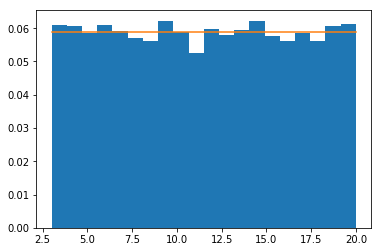

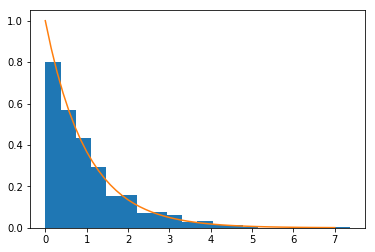

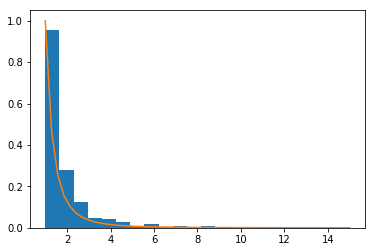

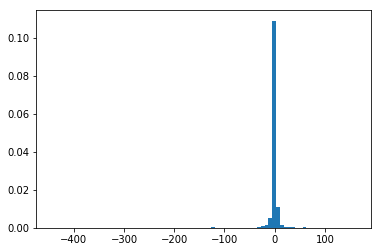

In [52]:
#Test 
#Normale Gleichverteilung
a0 = generator
def gleichverteilt(a, b, x):
    return 1/(b-a) *x/x
plt.figure(0)
plt.hist(a0, bins= 20, density=True);
plt.plot(np.linspace(0.01 ,1), gleichverteilt(0, 1, np.linspace(0.01,1)))

#Gleichverteilung mit Grenzen zwischen 3 und 20
a1 = gleichingrenzen(3,20, 10000)
plt.figure(1)
plt.hist(a1, bins= 20, density= True);
plt.plot(np.arange(3,21), gleichverteilt(3, 20, np.arange(3,21)))

#Exponentialgesetz mit Tau = 1 
def exp(tau, x):
    return 1/tau * np.exp(-x/tau)
a2 = gleich2exponential(1)
plt.figure(2)
plt.hist(a2, bins=20, density=True);
plt.plot(np.linspace(0,7), exp(1, np.linspace(0,7)))

#Potenzgesetz mit n= 3
def potenz(n, x):
    return x**(-n)
a3 = gleich2potenz(1, 15, 3)
plt.figure(3)
plt.hist(a3, bins=20, density =True)
plt.plot(np.linspace(1,15), potenz(3, np.linspace(1, 15)))

#Cauchyverteilung
def cauchy(x):
    return 1/np.pi * 1/(1+x**2)
a4 = gleich2cauchy()
plt.figure(4)
plt.hist(a4, bins= 80, density=True);
#plt.plot(np.linspace(0,2), cauchy(np.linspace(0, 2)))
None

Mit dem Neumann-Rückweisungsverfahren wird die Verteilung, die sich zu den Werten des empirischen Histogramms ergibt berechnet und anschließend dargestellt.

In [53]:
def neumann(x,y):
    u1, u2 = gleichingrenzen(0,1, 10**5), gleichingrenzen(0, np.amax(y), 10**5) 
    u = []
    for i in range(len(u1)):
        if y[np.argwhere((x < u1[i]+0.01) & (x >= u1[i]-0.01))[0,0]] > u2[i]:
            u = np.append(u, u1[i])
    return u

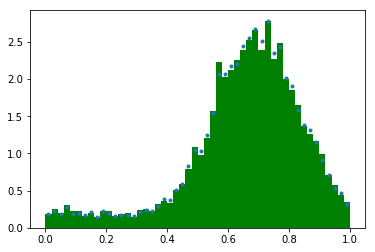

In [54]:
x,y = np.genfromtxt("empirisches_histogramm.csv", delimiter=",", unpack=True)
x = np.delete(x, 0) #Lösche nan in csv Datei
y = np.delete(y, 0) #Lösche nan in csv Datei
N = np.sum(0.02*y) #Bestimme Normierung
y = y/N #Normiere y 
plt.figure(5) 
plt.plot(x, y, "."); 
plt.hist(neumann(x,y), bins=50, color="green", density=True);
None

## Aufgabe 6 

### (a) 
Es soll ein Zufallszahlengenerator nach dem vorgegebenen Schema programmiert werden. Dabei sollen $b=3$ und $m = 1024$ gesetzt werden. 
Die Periodenlänge soll in Abhängigkeit von $a$ in einem angemessenen Bereich verwendet werden. 
Der Zusammenhang wird in einem Plot dargestellt. 


In [55]:
def lgc(a):
    x = np.array([20]) #seeed
    for i in range(1024):
        if (((a*x[i]+3)%1024) not in x):
            x = np.append(x, (a*x[i]+3)%1024) 
        else: 
            break
    return x    

In [56]:
# Test
def testfunc(a):
    anzahl = []
    for i in range(0, a):
            anzahl = np.append(anzahl, len(lgc(i)))
    return anzahl

Es wird graphisch ausgewertet, für welche Werte von $a$ die Funktion entweder aufgrund von Periodizität abbricht oder aufgrund von dem erreichen eines Fixpunktes abbricht. 

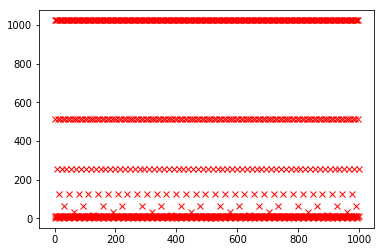

In [57]:
b = 1000
y = testfunc(b)
a = np.arange(b)

plt.figure(6)
plt.plot(a, y, "rx")
None

Es wird eine "Gleichverteilung mit dem $lgc$-Verfahren erstellt mit $a = 1601$, $b = 3456$ und mit einem Wert von $m = 10000$. Anschließend wird dieser geplottet.

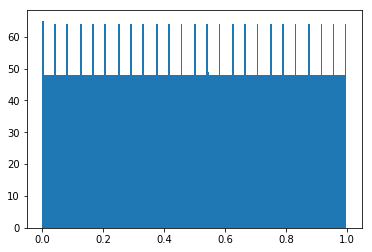

In [58]:
def newlgc(n, seeed):
    x = np.array([seeed])
    for i in range(n):
        x = np.append(x, (1601*x[i]+3456)%10000) 
    return x/10000

a = newlgc(10001, 20) #verschiedene Seeeds testen?, vielleicht for loop
b = newlgc(10001, 20)
plt.figure(7)
plt.hist(a, bins= 200);

Mit der vorher erstellten Gleichverteilung werden ein 2D- und 3D-Scatter erstellt. 

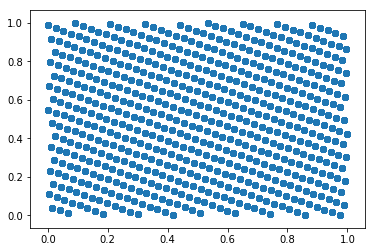

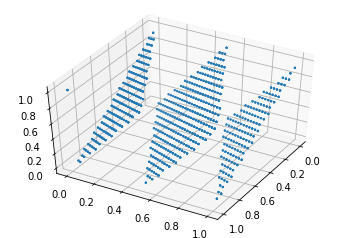

In [59]:
#2D 
neu1 = a[0::2]
neu2 = a[1::2]

plt.figure(8)
ax = plt.scatter(neu1, neu2)

#3D
new1 = b[0::3]
new2 = b[1::3]
new3 = b[2::3]

fig = plt.figure(9)
ax = fig.add_subplot(111 , projection ='3d')

ax.view_init(45, 30) # Elevation , Rotation
ax.scatter(
new1, new2, new3,
lw=0, # no lines around points
s=5,  # smaller points
)
None

Im Folgenden wird eine Gleichverteilung mit der $random.uniform$-Funktion erstellt und dieselbe graphische Auswertung durchgeführt wie zuvor.

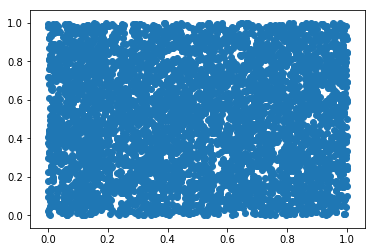

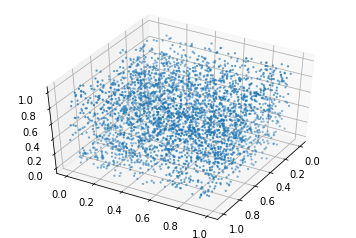

In [60]:
#2D
c = np.random.uniform(0,1, 10000)
neu1 = c[0::2]
neu2 = c[1::2]

plt.figure(8)
ax = plt.scatter(neu1, neu2)

#3D
d = np.random.uniform(0,1,10002)
new1 = d[0::3]
new2 = d[1::3]
new3 = d[2::3]

fig = plt.figure(9)
ax = fig.add_subplot(111 , projection ='3d')

ax.view_init(45, 30) # Elevation , Rotation
ax.scatter(
new1, new2, new3,
lw=0, # no lines around points
s=5,  # smaller points
)
None

Für die Funktion e wird getestet, wann der exakte Wert $\frac{1}{2}$ erzeugt wird. Es wird der Bereich für den Seeed von 0 bis 19.9 in 0.1er Schritten abgedeckt und anschließend ausgegeben, wie häufig der Wert einhalb für den jeweiligen Seeed erreicht wurde.

In [61]:
for p in range(200):
    e = newlgc(10001, 0.1*p)
    j = 0
    for i in range(10000):
        if (e[i] == 0.5):
            j = j+1
    if j != 0:
        print(j, "x bei Seeed ", p*0.1, sep="")

16x bei Seeed 8.0


# Nr. 7 

# Nr. 8 

### a) 
Zwei Populationen werden in einem zweidimesionalem Scatter-Plot dargestellt. 

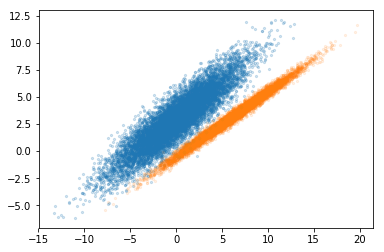

In [95]:
np.random.seed(42)
mean1 = [0, 3]
sigmax1, sigmay1 = 3.5, 2.6
covfac = 0.9
cov1 = [sigmax1**2, sigmax1*sigmay1*covfac],[sigmax1* sigmay1*covfac, sigmay1**2]


p1 = np.random.normal(6,3.5, 10000)
p2 = np.random.normal(-0.5+p1*0.6, 1/3.5, 10000)
p = np.c_[p1,p2]


plt.figure(10)
p0 = np.random.multivariate_normal(mean1, cov1, 10000)
plt.scatter(p0[:,0], p0[:,1], s=5, alpha= 0.2)
plt.scatter(p1, p2, s=5, alpha=0.1)


None

### b)

### c)

In [103]:
p3 = np.random.multivariate_normal(mean1, cov1, 1000)

data = pd.DataFrame({
    'p0 x': p0[:,0],
    'p0 y': p0[:,1],
    'p1 x': p[:,0], 
    'p1 y': p[:,1], 
    
})

data2 = pd.DataFrame({'p2 x': p3[:,0],
    'p2 y': p3[:,1]})


data.to_hdf('data.hdf5', key='data')
data2.to_hdf('data2.hdf5', key='data2')